## Classify New Video Inputs

If you simply want to get the classifcation output for your video, input the processed CSV file locations below and then scroll to the bottom to see the classification output after running.

A default test file is already set for testing purposes

In [1]:
# Face CSV file location
face_csv_file = '../test_video/test_face.csv'

# Body CSV file location
body_csv_file = '../test_video/test_body.csv'

# Sound CSV file location
sound_csv_file = '../test_video/test_audio.csv'

## Imports

In [2]:
# Imports used in this project file.

import numpy as np                                                   # https://numpy.org/
import matplotlib.pyplot as plt                                      # https://matplotlib.org/
import pandas as pd                                                  # https://pandas.pydata.org/

from sklearn import svm                                              # https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.svm import SVC                                          # https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
from sklearn.metrics import classification_report                    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
from sklearn.metrics import accuracy_score                           # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
from sklearn.model_selection import cross_val_score                  # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

import ast                                                           # https://docs.python.org/3/library/ast.html
import warnings                                                      # https://docs.python.org/3/library/warnings.html

from sklearn.preprocessing import StandardScaler                     # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.decomposition import PCA                                # https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
import statistics
from scipy.stats import mode                                          # https://docs.python.org/3/library/statistics.html
from sklearn.model_selection import train_test_split                 # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.neural_network import MLPClassifier                     # https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
import seaborn as sns                                                # https://seaborn.pydata.org/

from sklearn.preprocessing import LabelEncoder

import librosa
import librosa.display
import os

# Used to get rid of repeated depricated warnings
warnings.filterwarnings("ignore")

# set plots to look nice
sns.set()

## Sound Data Classification

In [3]:
# read CSV file
df = pd.read_csv('../Dataset/Classification_csv/audio_features.csv')

# Separate features and labels
X = df.drop(['Filename', 'Subcategory','Country'], axis=1)
y_sub = df['Subcategory']
y_cou = df['Country']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into a training set and a test set for subcategory
X_sub_train, X_sub_test, y_sub_train, y_sub_test = train_test_split(X_scaled, y_sub, test_size=0.2, random_state=42)

# Split the dataset into a training set and a test set for country
X_cou_train, X_cou_test, y_cou_train, y_cou_test = train_test_split(X_scaled, y_cou, test_size=0.2, random_state=42)


Classification Report:
              precision    recall  f1-score   support

     Nervous       0.71      0.80      0.75        15
   Surprised       0.58      0.44      0.50        16
  Threatened       0.27      0.33      0.30         9

    accuracy                           0.55        40
   macro avg       0.52      0.52      0.52        40
weighted avg       0.56      0.55      0.55        40

Accuracy: 0.55
[0.4        0.3        0.6        0.6        0.4        0.4
 0.7        0.8        0.3        0.5        0.5        0.6
 0.5        0.3        0.6        0.2        0.4        0.5
 0.4        0.44444444]


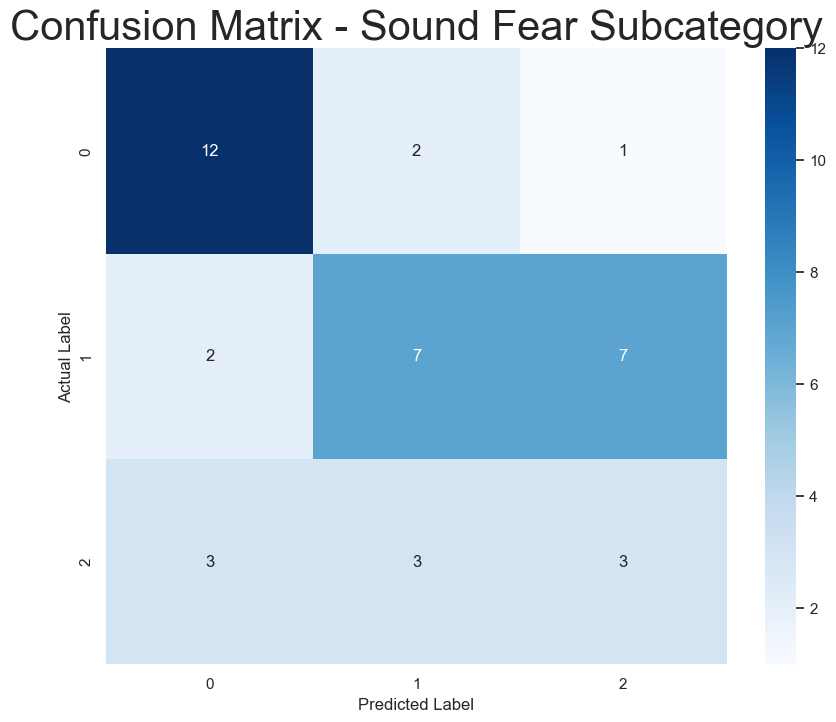

In [4]:
#Nerual Network for subcategory
mlp_subcategory_sound = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=2)

# Train the MLP classifier on the training data
mlp_subcategory_sound.fit(X_sub_train, y_sub_train)

# Predict the labels for the test data using the trained classifier
y_sub_pred = mlp_subcategory_sound.predict(X_sub_test)

# Calculate the accuracy of the classifier on the test data
sub_accuracy = accuracy_score(y_sub_test, y_sub_pred)

# Generate a classification report showing precision, recall, F1-score, and support for each class
sub_report = classification_report(y_sub_test, y_sub_pred)

# Generate a confusion matrix to visualize the performance of the classifier
sub_conf_matrix = confusion_matrix(y_sub_test, y_sub_pred)

# Print the classification report
print("Classification Report:")
print(sub_report)
# Print the accuracy of the classifier
print("Accuracy:", sub_accuracy)

# Generate a accuracy scores for subcategory
sub_accuracy_scores = cross_val_score(mlp_subcategory_sound, X_scaled, y_sub, cv=20)
print(sub_accuracy_scores)

# Create a heatmap of the confusion matrix for visualization
plt.figure(figsize=(10, 8))
sns.heatmap(sub_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Sound Fear Subcategory', fontsize=30)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

Classification Report:
              precision    recall  f1-score   support

      Canada       0.25      0.33      0.29         9
       China       0.71      0.42      0.53        12
       India       0.18      0.29      0.22         7
      Turkey       0.70      0.58      0.64        12

    accuracy                           0.42        40
   macro avg       0.46      0.40      0.42        40
weighted avg       0.51      0.42      0.45        40

Accuracy: 0.425
[0.8        0.3        0.4        0.4        0.5        0.6
 0.4        0.7        0.4        0.2        0.2        0.5
 0.4        0.6        0.4        0.2        0.5        0.5
 0.5        0.44444444]


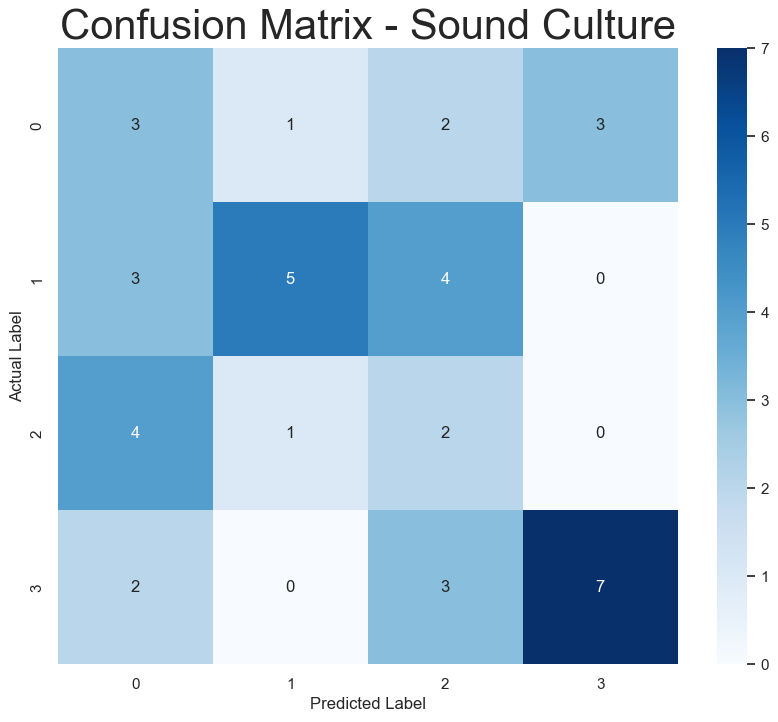

In [5]:
# Neural Network for country
mlp_country_sound = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=1)
# Train the MLP classifier on the training data
mlp_country_sound.fit(X_cou_train, y_cou_train)

# Predict the labels for the test data using the trained classifier
y_cou_pred = mlp_country_sound.predict(X_cou_test)

# Calculate the accuracy of the classifier on the test data
cou_accuracy = accuracy_score(y_cou_test, y_cou_pred)

# Generate a classification report showing precision, recall, F1-score, and support for each class
cou_report = classification_report(y_cou_test, y_cou_pred)

# Generate a confusion matrix to visualize the performance of the classifier
cou_conf_matrix = confusion_matrix(y_cou_test, y_cou_pred)

# Print the classification report
print("Classification Report:")
print(cou_report)
# Print the accuracy of the classifier
print("Accuracy:", cou_accuracy)

# Generate a accuracy scores for country
country_accuracy_scores = cross_val_score(mlp_country_sound, X_scaled, y_cou, cv=20)
print(country_accuracy_scores)

# Create a heatmap of the confusion matrix for visualization
plt.figure(figsize=(10, 8))
sns.heatmap(cou_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Sound Culture',fontsize=30)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## Body Data Classification

In [6]:
# store a list of column names for the body annotations
col_list = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22', '23','24']

# Read in body data
data_body = pd.read_csv("../Dataset/Classification_csv/Body_Annotations.csv", index_col=[0])

count_row = data_body.shape[0]

In [7]:
# Turn all string number cells inside dataframe into floats so we can use it inside a classifer and for analysis.
for x in range (0, count_row):
    test_df = data_body.iloc[x]
    for y in range(0, 25):
        test_df[col_list[y]] = ast.literal_eval(test_df[col_list[y]])

    data_body.iloc[x] = test_df

In [8]:
# Create PCA for reducing dimensions and standardscaler to scale values.
pca_body = PCA(n_components=1)
sscaler = StandardScaler()

# PCA reduce all body keypoint data into 1 dimension
for x in range (0, 25):
    for y in range(0, count_row):
        test_df = data_body[col_list[x]][y]
        pca_body.fit(test_df)
        test_df = pca_body.fit_transform(test_df)
        data_body[col_list[x]][y] = test_df

# Further reduce data into 1 median value to fit the data inside a SVM and Neural Network
for x in range (0, 25):
    for y in range(0, count_row):
        test_array = np.concatenate(data_body[col_list[x]][y])
        med = statistics.median(test_array)
        data_body[col_list[x]][y] = med

In [9]:
# Check dataframe is correct with single values at each cell
data_body

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,video,Label,Subcategory
0,-85.41019,-34.26776,-152.140809,0.0,0.0,-744.628318,-38.908077,0.0,0.0,0.0,...,-258.274969,0.0,0.0,0.0,0.0,0.0,0.0,CA_Nervous_1.mp4,Canada,Nervous
1,-0.757722,-169.689731,-204.078085,0.0,0.0,-276.91051,0.0,0.0,0.0,0.0,...,-37.217944,0.0,0.0,0.0,0.0,0.0,0.0,CA_Nervous_10.mp4,Canada,Nervous
2,115.214549,-57.725951,-431.6377,-350.658784,-295.294157,-9.834643,-525.718605,-561.957656,-648.360645,638.13291,...,-546.877626,0.0,0.0,0.0,0.0,0.0,0.0,CA_Nervous_12.mp4,Canada,Nervous
3,2.329016,0.431834,2.310182,0.0,0.0,-24.163393,0.0,0.0,0.0,0.0,...,14.755449,0.0,0.0,0.0,0.0,0.0,0.0,CA_Nervous_13.mp4,Canada,Nervous
4,-13.579698,-0.51388,-3.98248,0.0,0.0,-0.888759,-101.230952,0.0,0.0,0.0,...,-4.202708,0.0,0.0,0.0,0.0,0.0,0.0,CA_Nervous_14.mp4,Canada,Nervous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-5.092397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-235.96953,0.0,0.0,0.0,0.0,0.0,0.0,CA_Nervous_17.mp4,Canada,Nervous
196,0.33227,0.042143,0.095883,0.0,0.0,-1.096622,0.0,0.0,0.0,0.0,...,0.467385,0.0,0.0,0.0,0.0,0.0,0.0,CA_Surprised_15.mp4,Canada,Surprised
197,-11.067747,-1.246004,-5.66331,0.0,0.0,-30.563015,0.0,0.0,0.0,0.0,...,-9.249558,0.0,0.0,0.0,0.0,0.0,0.0,CA_Threatened_18.mp4,Canada,Threatened
198,-123.749051,-132.071937,-174.226715,-301.737338,0.0,-97.521366,-389.625685,-63.987613,-28.156832,-26.895716,...,-140.017331,0.0,0.0,0.0,0.0,0.0,0.0,I_Nervous_17.mp4,India,Nervous


In [10]:
# FEAR CULTURE ClASSIFICATION

# Drop unneeded columns for classification
df_data_body = data_body.drop(['video', 'Label','Subcategory'], axis=1)

# Scale feature data
X_d_body = sscaler.fit_transform(df_data_body)
# Get y true labels
y_body = data_body['Label']

# Create train and test split for MLP NN
X_train, X_test, y_train, y_test = train_test_split(X_d_body, y_body, test_size=0.2, random_state=42)

In [11]:
# Create Multi-layer perceptron neural network
mlp_body = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=1)

# Fit our data to the mlp
mlp_body.fit(X_train, y_train)

# predict test set
y_pred = mlp_body.predict(X_test)

# print out accuracy
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)
print("Accuracy:", accuracy)

Classification Report:
              precision    recall  f1-score   support

      Canada       0.25      0.33      0.29         6
       China       0.80      0.50      0.62         8
       India       0.54      0.64      0.58        11
      Turkey       0.79      0.73      0.76        15

    accuracy                           0.60        40
   macro avg       0.59      0.55      0.56        40
weighted avg       0.64      0.60      0.61        40

Accuracy: 0.6


In [12]:
# Get Neural Network body classification cross validation with 20 cross validations
cross_score = cross_val_score(mlp_body, X_d_body, y_body, cv=20)

# Get median cross validation score
statistics.median(cross_score)

0.4

In [13]:
# FEAR SUB CATEGORIES ClASSIFICATION

# Drop unneeded columns for classification
df_data_subcat = data_body.drop(['video', 'Label','Subcategory'], axis=1)

# Scale feature data
X_d_body = sscaler.fit_transform(df_data_subcat)

# Get y true labels
y_body = data_body['Subcategory']

# Create train and test split
X_train, X_test, y_train, y_test = train_test_split(X_d_body, y_body, test_size=0.2, random_state=42)

In [14]:
# Create multi-layer perceptron classifier
mlp_subcat_body = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=1)

# Fit MLP to our training data
mlp_subcat_body.fit(X_train, y_train)

# Predict test data
y_pred = mlp_subcat_body.predict(X_test)

# Print out accuracy
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)
print("Accuracy:", accuracy)

Classification Report:
              precision    recall  f1-score   support

     Nervous       0.46      0.60      0.52        10
   Surprised       0.64      0.37      0.47        19
  Threatened       0.44      0.64      0.52        11

    accuracy                           0.50        40
   macro avg       0.51      0.53      0.50        40
weighted avg       0.54      0.50      0.49        40

Accuracy: 0.5


In [15]:
# Get cross Validation Score for subcategory
cross_score2 = cross_val_score(mlp_subcat_body, X_d_body, y_body, cv=20)

# Get median cross validation score
statistics.median(cross_score2)

0.5

## Face Data Classification

In [16]:
#Load data for culture
data_face = pd.read_csv('../Dataset/Classification_csv/Face_features.csv')

# Select features
features = data_face[['AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU07_c', 'AU20_c', 'AU25_c']]

# get y labels
y = data_face['Country']

# Encode the 'Country' column
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Prepare the data
X = features

# Scale the features
scaler_f = StandardScaler()
X_scaled = scaler_f.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.1, random_state=6)

# Define and train the model
mlp_face_cult = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=1)
mlp_face_cult.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = mlp_face_cult.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Classification Report for Culture Prediction:")
print(report)
print("Accuracy for Culture Prediction:", accuracy)

Classification Report for Culture Prediction:
              precision    recall  f1-score   support

           0       0.20      0.33      0.25         3
           1       0.12      0.50      0.20         2
           2       0.33      0.25      0.29         4
           3       0.50      0.18      0.27        11

    accuracy                           0.25        20
   macro avg       0.29      0.32      0.25        20
weighted avg       0.38      0.25      0.26        20

Accuracy for Culture Prediction: 0.25


In [17]:

cross_score_face_cult = cross_val_score(mlp_face_cult, X, y, cv=20)
cross_score_face_cult

array([0.2, 0.2, 0.3, 0.3, 0.2, 0.1, 0.4, 0.4, 0.3, 0.4, 0.1, 0.2, 0.4,
       0.3, 0.5, 0.2, 0. , 0.2, 0.4, 0.3])

In [18]:
# Drop non-feature columns and select features
features = data_face[['AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU07_c', 'AU20_c', 'AU25_c']]
# Encode the 'Emotion' column
label_encoder2 = LabelEncoder()
y = label_encoder2.fit_transform(data_face['Emotion'])

# Scale the features
scaler_e = StandardScaler()
X_scaled = scaler_e.fit_transform(features)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=4)

# Define and train the model
mlp_face_emotion = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=1)
mlp_face_emotion.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = mlp_face_emotion.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Classification Report for Emotion Prediction:")
print(report)
print("Accuracy for Emotion Prediction:", accuracy)

Classification Report for Emotion Prediction:
              precision    recall  f1-score   support

           0       0.14      0.25      0.18         4
           1       0.38      0.60      0.46         5
           2       0.40      0.18      0.25        11

    accuracy                           0.30        20
   macro avg       0.31      0.34      0.30        20
weighted avg       0.34      0.30      0.29        20

Accuracy for Emotion Prediction: 0.3


In [19]:
cross_score_face_sub = cross_val_score(mlp_face_emotion, X, y, cv=20)
cross_score_face_sub

array([0.2, 0.3, 0.2, 0.1, 0.3, 0.5, 0.1, 0.2, 0.3, 0.2, 0.1, 0.4, 0.5,
       0.2, 0.3, 0.2, 0.2, 0.2, 0.5, 0.2])

## Analysis and Other

### SVM model body annotations accuracy comparison

In [20]:
# SVM for Body Annotations Culture
# Drop unneeded columns for classification
df_data_body = data_body.drop(['video', 'Label','Subcategory'], axis=1)

# Scale feature data
X_d_body = sscaler.fit_transform(df_data_body)
# Get y true labels
y_body = data_body['Label']

In [21]:
# Create train and test split for SVM
X_train, X_test, y_train, y_test = train_test_split(X_d_body, y_body, test_size=0.2, random_state=42)

In [22]:
# Create Linear SVM, and train it with our data
model_SVM_body = SVC(kernel='linear')
model_SVM_body.fit(X_train, y_train)

# predict test set
y_pred = model_SVM_body.predict(X_test)

#Print Accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Classification Report:
              precision    recall  f1-score   support

      Canada       0.18      0.33      0.24         6
       China       0.33      0.12      0.18         8
       India       0.50      0.55      0.52        11
      Turkey       0.79      0.73      0.76        15

    accuracy                           0.50        40
   macro avg       0.45      0.43      0.42        40
weighted avg       0.53      0.50      0.50        40

Accuracy: 0.5


In [23]:
# SVM for body Annotations Subcategory

# Create SVM linear model
model_svm_subcat = SVC(kernel="linear")

# Fit it to training data
model_svm_subcat.fit(X_train, y_train)

# Predict test dataset
y_pred = model_svm_subcat.predict(X_test)

# Print Accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
# Print the accuracy
print("Accuracy:", accuracy)

Classification Report:
              precision    recall  f1-score   support

      Canada       0.18      0.33      0.24         6
       China       0.33      0.12      0.18         8
       India       0.50      0.55      0.52        11
      Turkey       0.79      0.73      0.76        15

    accuracy                           0.50        40
   macro avg       0.45      0.43      0.42        40
weighted avg       0.53      0.50      0.50        40

Accuracy: 0.5


### SVM model sound annotations accuracy comparison

Classification Report:
              precision    recall  f1-score   support

      Canada       0.18      0.33      0.24         6
       China       0.33      0.12      0.18         8
       India       0.50      0.55      0.52        11
      Turkey       0.79      0.73      0.76        15

    accuracy                           0.50        40
   macro avg       0.45      0.43      0.42        40
weighted avg       0.53      0.50      0.50        40

Accuracy: 0.5
[0.4 0.2 0.3 0.2 0.5 0.5 0.1 0.2 0.3 0.4 0.3 0.4 0.6 0.4 0.2 0.4 0.3 0.2
 0.4 0.4]


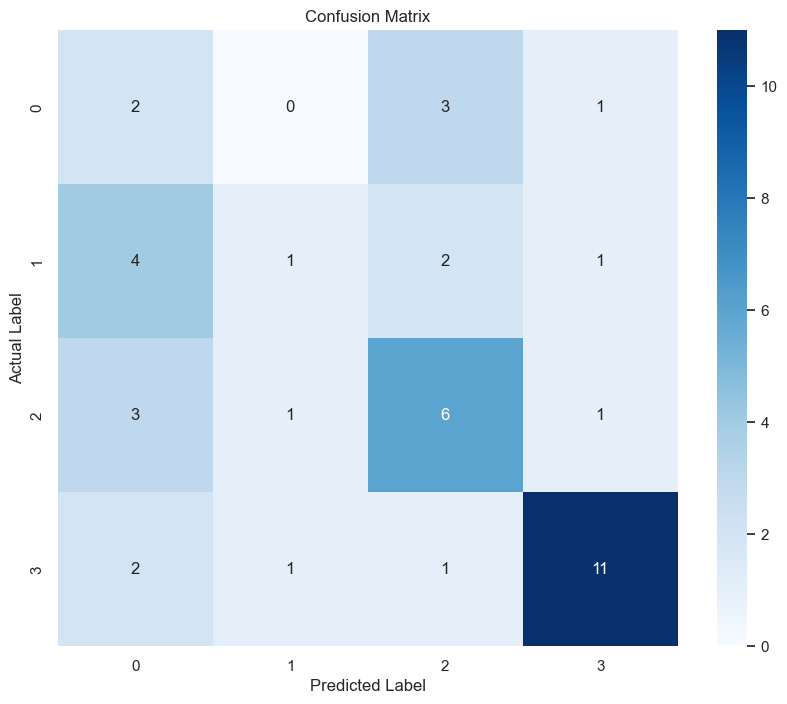

In [24]:
# Training SVM model with a linear kernel
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report
report = classification_report(y_test, y_pred)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)
accuracy_scores = cross_val_score(model, X_scaled, y, cv=20)
print(accuracy_scores)
# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

### SVM model face annotations accuracy comparison

In [25]:
data_face_culture = data_face.drop(['File Name', 'Country'], axis=1)
features = data_face_culture[['AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU07_r', 'AU20_r', 'AU25_r']]

# Target variable encoding
label_encoder3 = LabelEncoder()
data_face['Country_encoded'] = label_encoder3.fit_transform(data_face['Country'])
target = data_face['Country_encoded']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVM model
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

# Make predictions
predictions = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions, target_names=label_encoder.classes_))


Accuracy: 0.2833333333333333
Classification Report:
               precision    recall  f1-score   support

      Canada       0.40      0.21      0.28        19
       China       0.24      0.44      0.31         9
       India       0.40      0.10      0.16        20
      Turkey       0.25      0.58      0.35        12

    accuracy                           0.28        60
   macro avg       0.32      0.33      0.27        60
weighted avg       0.35      0.28      0.26        60



### Cross Validation Accuracy Plots

In [26]:
# CROSS VALIDATION ACCURACY PLOT FOR SUBCATEGORY
plot_df = pd.DataFrame(columns=['Body','Face','Sound'])

# Get all cross validation scores
plot_df['Body'] = cross_score2
plot_df['Face'] = cross_score_face_sub
plot_df['Sound'] = sub_accuracy_scores
plot_df

,Body,Face,Sound
0,0.3,0.2,0.400000
1,0.3,0.3,0.300000
2,0.1,0.2,0.600000
3,0.5,0.1,0.600000
4,0.6,0.3,0.400000
5,0.7,0.5,0.400000
6,0.5,0.1,0.700000
7,0.4,0.2,0.800000
8,0.7,0.3,0.300000
9,0.7,0.2,0.500000


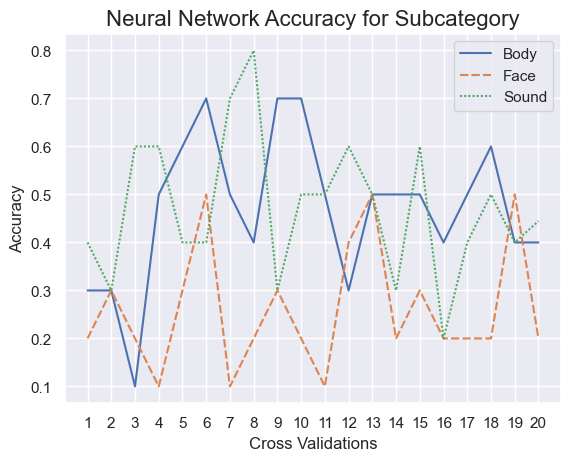

In [27]:
#place them all onto a simple lineplot
ax = sns.lineplot(data=plot_df)
ax.set(xlabel='Cross Validations', ylabel='Accuracy')
ax.set_title("Neural Network Accuracy for Subcategory",fontsize=16)
xs = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
ax.set_xticks(np.arange(len(xs)), np.arange(1, len(xs)+1))

In [28]:
# CROSS VALIDATION ACCURACY PLOT FOR CULTURE
plot_df2 = pd.DataFrame(columns=['Body','Face','Sound'])

plot_df2['Body'] = cross_score
plot_df2['Face'] = cross_score_face_cult
plot_df2['Sound'] = country_accuracy_scores
plot_df2

,Body,Face,Sound
0,0.0,0.2,0.800000
1,0.4,0.2,0.300000
2,0.4,0.3,0.400000
3,0.3,0.3,0.400000
4,0.3,0.2,0.500000
5,0.4,0.1,0.600000
6,0.3,0.4,0.400000
7,0.2,0.4,0.700000
8,0.4,0.3,0.400000
9,0.2,0.4,0.200000


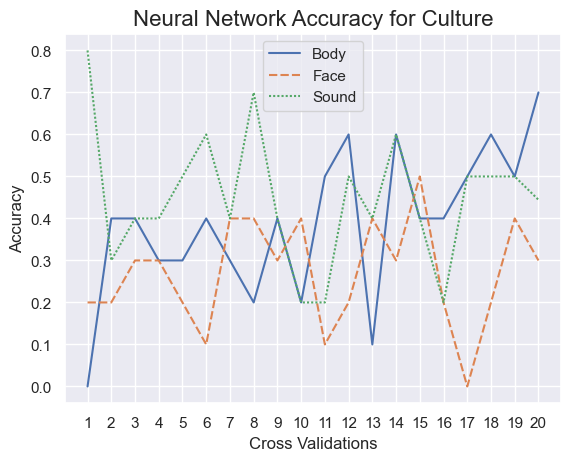

In [29]:
ax = sns.lineplot(data=plot_df2)
ax.set(xlabel='Cross Validations', ylabel='Accuracy')
ax.set_title("Neural Network Accuracy for Culture",fontsize=16)
xs = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
ax.set_xticks(np.arange(len(xs)), np.arange(1, len(xs)+1))

### Sound Plots

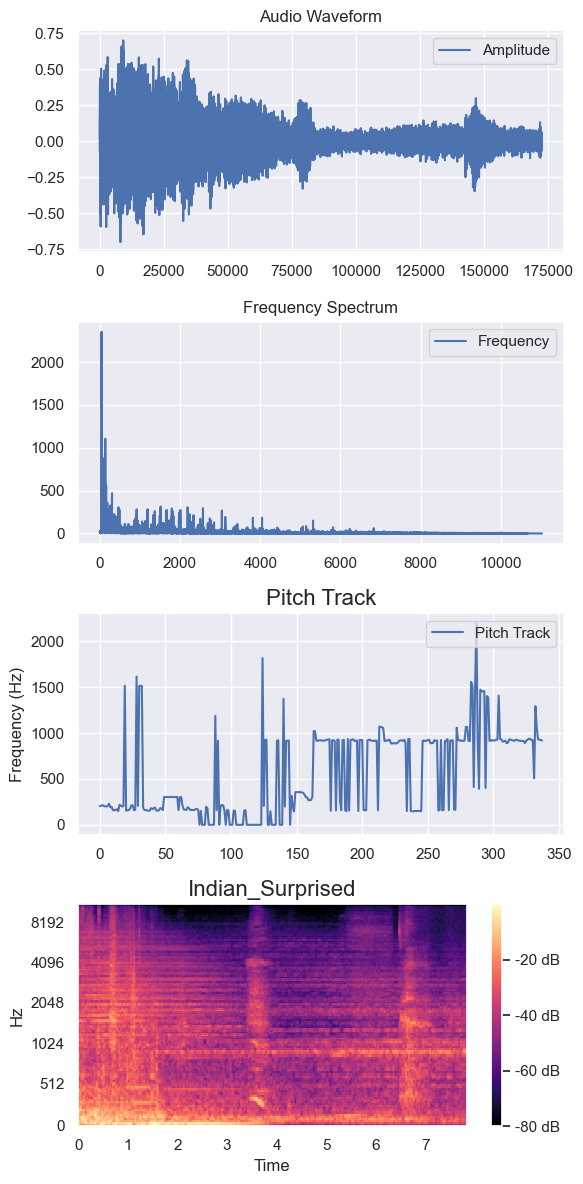

In [30]:
# Load the audio file
# You can try any sample here.
audio_path = '../Misc/I_Surprised_7.mp3'
y, sr = librosa.load(audio_path)

# Compute amplitude
amplitude = np.abs(y)

# Compute frequency using the Fast Fourier Transform (FFT)
fft = np.fft.fft(y)
magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))

# Perform pitch tracking with librosa
pitches, magnitudes = librosa.piptrack(y=y, sr=sr)

# Extract the dominant pitch for each time frame
pitch_track = []
# The length of the time axis
for t in range(magnitudes.shape[1]):
    index = magnitudes[:, t].argmax()
    pitch_track.append(pitches[index, t])

pitch_track = np.array(pitch_track)

# Calculate the Mel spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.power_to_db(S, ref=np.max)

# Create the plots
fig, axs = plt.subplots(4, 1, figsize=(6, 12))

# Plot the amplitude waveform
axs[0].plot(y, label="Amplitude")
axs[0].set_title('Audio Waveform')
axs[0].legend(loc="upper right")

# Plot the frequency spectrum
half_len = len(frequency) // 2
axs[1].plot(frequency[:half_len], magnitude[:half_len], label="Frequency")
axs[1].set_title('Frequency Spectrum')
axs[1].legend(loc="upper right")

# Plot the pitch track showing variations over time
axs[2].plot(pitch_track, label="Pitch Track")
axs[2].set_title('Pitch Track',fontsize=16)
axs[2].set_ylabel('Frequency (Hz)')
axs[2].legend(loc="upper right")

# Plot the Mel spectrogram
librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel', ax=axs[3])
axs[3].set_title('Indian_Surprised',fontsize=16)
axs[3].figure.colorbar(librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel', ax=axs[3]), ax=axs[3], format='%+2.0f dB')

plt.tight_layout()
plt.show()

### Face Plots

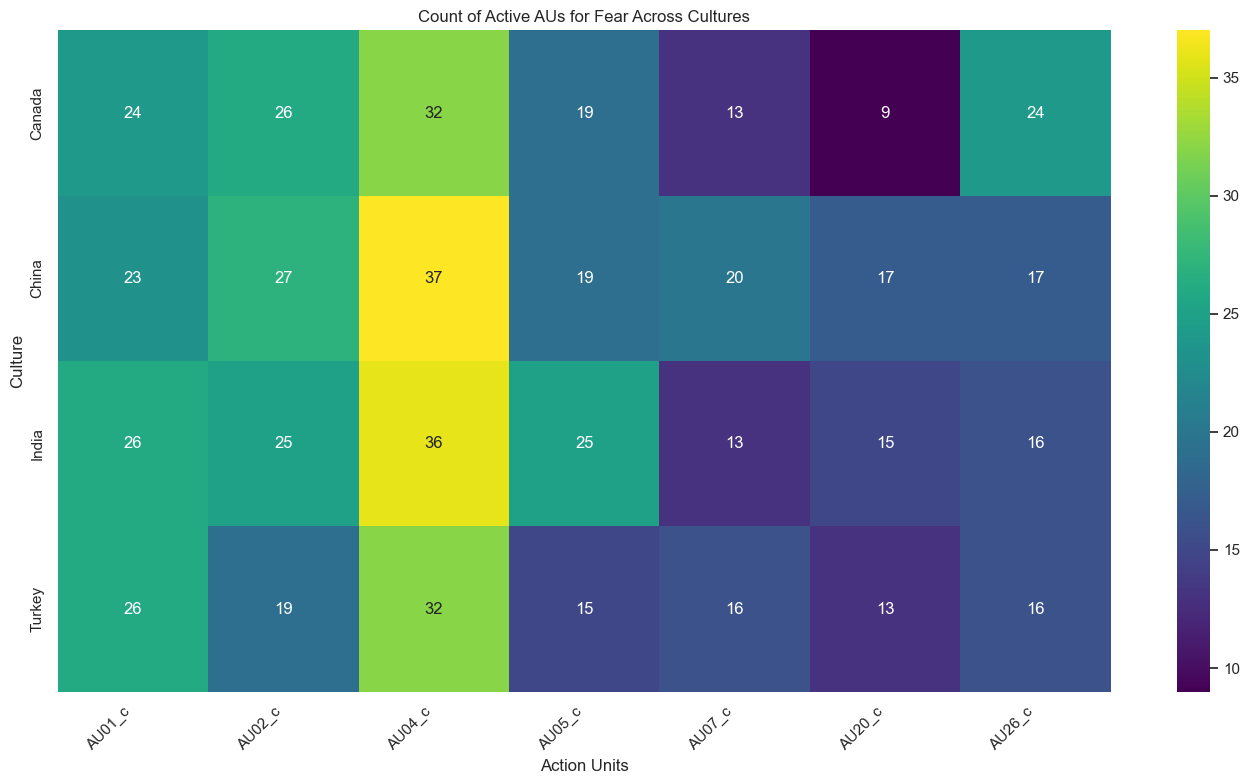

In [31]:
# Relevant AUs for fear
au_fear = ['AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU07_c', 'AU20_c', 'AU26_c']

# Count the number of times each AU is active (equals 1) within each cultural group
culture_au_counts = data_face.groupby('Country')[au_fear].sum()

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(culture_au_counts, cmap='viridis', annot=True)
plt.title('Count of Active AUs for Fear Across Cultures')
plt.ylabel('Culture')
plt.xlabel('Action Units')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Classify New Video

In [32]:
# Load each of the processed csv files here
data_face_new = pd.read_csv(face_csv_file)
data_body_nv = pd.read_csv(body_csv_file, index_col=[0])
df = pd.read_csv(sound_csv_file)

count_row = data_body_nv.shape[0]

# Turn all string number cells inside dataframe into floats so we can use it inside a classifer and for analysis.
for x in range (0, count_row):
    test_df = data_body_nv.iloc[x]
    for y in range(0, 25):
        test_df[col_list[y]] = ast.literal_eval(test_df[col_list[y]])

    data_body_nv.iloc[x] = test_df

# PCA reduce all body keypoint data into 1 dimension
for x in range (0, 25):
    for y in range(0, count_row):
        test_df = data_body_nv[col_list[x]][y]
        pca_body.fit(test_df)
        test_df = pca_body.fit_transform(test_df)
        data_body_nv[col_list[x]][y] = test_df

# Further reduce data into 1 median value to fit the data inside a SVM and Neural Network
for x in range (0, 25):
    for y in range(0, count_row):
        test_array = np.concatenate(data_body_nv[col_list[x]][y])
        med = statistics.median(test_array)
        data_body_nv[col_list[x]][y] = med

# drop not needed columns
data_body_nv_x = data_body_nv.drop(['video', 'Label','Subcategory'], axis=1)

# Scale feature data
X_d_body = sscaler.fit_transform(data_body_nv_x)


# process for sound
# Separate features and labels
X = df.drop(['Filename', 'Country','Subcategory'], axis=1)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# process for face new video
data_face_new = data_face_new[['AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU07_c', 'AU20_c', 'AU25_c']]
X_scaled_new = scaler_f.transform(data_face_new)
X_scaled_e = scaler_e.transform(data_face_new)

#predict body
y_body_pred = mlp_body.predict(X_d_body)
y_body_pred2 = mlp_subcat_body.predict(X_d_body)

#predict face
y_face_pred = mlp_face_cult.predict(X_scaled_new)
y_face_pred_decoded = label_encoder.inverse_transform(y_face_pred)
y_face_pred2 = mlp_face_emotion.predict(X_scaled_e)
y_face_pred2_decoded = label_encoder2.inverse_transform(y_face_pred2)

#predict sound
y_pred_sound = mlp_subcategory_sound.predict(X_scaled)
y_pred_sound2 = mlp_country_sound.predict(X_scaled)


# Merge classifers and predict final outcome
combined_predictions = [y_face_pred_decoded[0], y_body_pred[0], y_pred_sound2[0]]
combined_predictions2 = [y_face_pred2_decoded[0], y_body_pred2[0], y_pred_sound[0]]

store_final = max(set(combined_predictions), key=combined_predictions.count)
store_final2= max(set(combined_predictions2), key=combined_predictions2.count)

print("Predicted: " + store_final +" "+ store_final2)

Predicted: Turkey Threatened
